In [48]:
import tensorflow as tf 
import os
import cv2 #fokus pada manipulasi dan analisis gambar
import imghdr #alat bantu untuk mengenali jenis file gambar
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import pyplot as plt

In [60]:
#path directory
data_dir = 'data'

In [61]:
os.listdir(data_dir)

['Alor Island',
 'Bukit Warinding',
 'Danau Kelimut',
 'Komodo National Park',
 'Lasiana Beach',
 'Nahiwutu Beach',
 'Oetune Beach',
 'Pandar Island',
 'Pink Beach',
 'Wae Rebo Village',
 'Waikuri Lagoon']

In [62]:
#cek file
os.listdir(os.path.join(data_dir, 'Pandar Island'))

['download (1).jpg',
 'download (10).jpg',
 'download (11).jpg',
 'download (2).jpg',
 'download (3).jpg',
 'download (4).jpg',
 'download (5).jpg',
 'download (6).jpg',
 'download (7).jpg',
 'download (8).jpg',
 'download (9).jpg',
 'download.jpg',
 'images (1).jpg',
 'images (10).jpg',
 'images (100).jpg',
 'images (11).jpg',
 'images (12).jpg',
 'images (13).jpg',
 'images (14).jpg',
 'images (15).jpg',
 'images (16).jpg',
 'images (17).jpg',
 'images (18).jpg',
 'images (19).jpg',
 'images (2).jpg',
 'images (20).jpg',
 'images (21).jpg',
 'images (22).jpg',
 'images (23).jpg',
 'images (24).jpg',
 'images (25).jpg',
 'images (26).jpg',
 'images (27).jpg',
 'images (28).jpg',
 'images (29).jpg',
 'images (3).jpg',
 'images (30).jpg',
 'images (31).jpg',
 'images (32).jpg',
 'images (33).jpg',
 'images (34).jpg',
 'images (35).jpg',
 'images (36).jpg',
 'images (37).jpg',
 'images (38).jpg',
 'images (39).jpg',
 'images (4).jpg',
 'images (40).jpg',
 'images (41).jpg',
 'images (42)

In [63]:
image_exts = ['jpg', 'jpeg']

In [64]:
for image_class in os.listdir(data_dir):
    print(image_class)

Alor Island
Bukit Warinding
Danau Kelimut
Komodo National Park
Lasiana Beach
Nahiwutu Beach
Oetune Beach
Pandar Island
Pink Beach
Wae Rebo Village
Waikuri Lagoon


In [65]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

2016_09_23_12618_1474618668._large.jpg
20171217-IMG_9977.jpg
2018-08-08 (1).jpg
2018-08-08 (2).jpg
2018-08-08 (3).jpg
2018-08-08.jpg
2018-09-05.jpg
2018-11-25.jpg
20181028_112822.jpg
2020-02-05.jpg
2021-06-06 (1).jpg
2021-06-06.jpg
2022-03-07.jpg
2022-11-28.jpg
2023-12-29 (1).jpg
2023-12-29.jpg
alor-025.jpg
alor-divers-eco-resort.jpg
alor-travel-guide-1140x550.jpg
Alor1.jpeg
Alor3-1024x622-1.jpeg
alor_island.jpg
download (1).jpg
download.jpg
images (1).jpg
images (10).jpg
images (11).jpg
images (12).jpg
images (2).jpg
images (3).jpg
images (4).jpg
images (5).jpg
images (6).jpg
images (7).jpg
images (8).jpg
images (9).jpg
images.jpg
Kepa-Island-Alor.jpg
kepa_island.jpg
P1015319.JPG
Pulau-alor-2.jpg
sebanjar-beach-alor-island-indonesia-600nw-1912283014.jpg
13-Bukit-Warinding_Sumba_1920x1080px.jpg
20230312_234348_0001-01.jpeg
82575313_2760735143949491_970615493104762880_n.jpg
82841609_2760735317282807_4262575838064541696_n.jpg
9826263_20171004024920.jpg
@karl_shakur-1.jpg
beautiful-sunset

In [66]:
#cek gambar di folder pandar island
img = cv2.imread(os.path.join('data', 'Pandar Island', 'images (100).jpg'))
img

array([[[120,  66,   3],
        [120,  66,   3],
        [120,  66,   3],
        ...,
        [141,  87,  22],
        [141,  87,  22],
        [141,  87,  22]],

       [[121,  67,   4],
        [121,  67,   4],
        [120,  66,   3],
        ...,
        [141,  87,  22],
        [141,  87,  22],
        [141,  87,  22]],

       [[124,  68,   3],
        [124,  68,   3],
        [124,  68,   3],
        ...,
        [142,  88,  23],
        [142,  88,  23],
        [142,  88,  23]],

       ...,

       [[132,  87,   6],
        [132,  87,   6],
        [129,  86,   7],
        ...,
        [ 49,  99,  97],
        [ 61, 114, 111],
        [ 48,  98,  96]],

       [[134,  87,   6],
        [132,  87,   6],
        [131,  85,   8],
        ...,
        [ 33,  83,  81],
        [ 49,  99,  97],
        [ 36,  86,  84]],

       [[134,  87,   6],
        [131,  86,   5],
        [130,  84,   7],
        ...,
        [ 20,  69,  67],
        [ 41,  90,  88],
        [ 29,  78,  76]]

In [67]:
#cek ukuran
img.shape

(163, 309, 3)

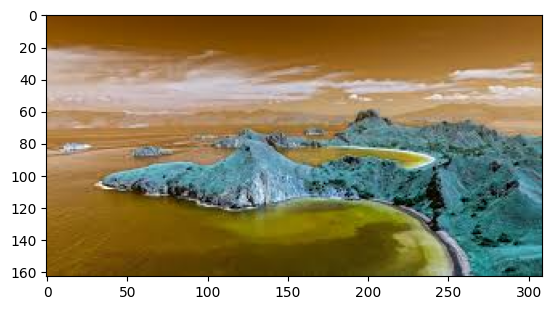

In [68]:
plt.imshow(img)

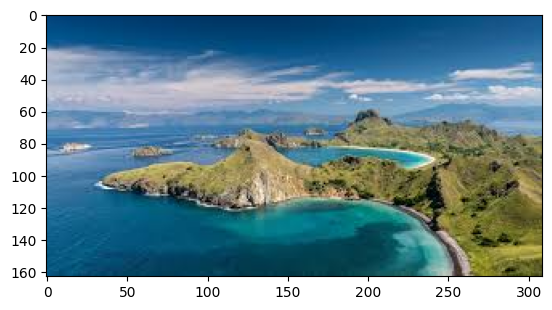

In [69]:
#ubah ke rgb
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [70]:
#pilih gambar yg jpg
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        img_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(img_path)
            tip = imghdr.what(img_path)
            if tip not in image_exts:
                print('remove non jpg image {}'.format(img_path))
                os.remove(img_path)
        except:
            print('ada masalah dengan gambar {}'.format(img_path))

## load data

In [13]:
#load data
data = tf.keras.utils.image_dataset_from_directory('data', image_size=(244,244))


Found 1639 files belonging to 9 classes.


In [14]:
#ubah data supaya bisa diiterasi
data_iterator = data.as_numpy_iterator()
data_iterator

In [15]:
#akses datanya
batch = data_iterator.next()
#image dan label

In [16]:
len(batch) 

2

In [17]:
#gambar
batch[0].shape 

(32, 244, 244, 3)

In [18]:
#label
batch[1]

array([6, 7, 2, 2, 5, 2, 1, 7, 7, 6, 8, 6, 1, 5, 5, 7, 8, 5, 7, 6, 2, 2,
       3, 6, 7, 4, 8, 2, 2, 7, 6, 5])

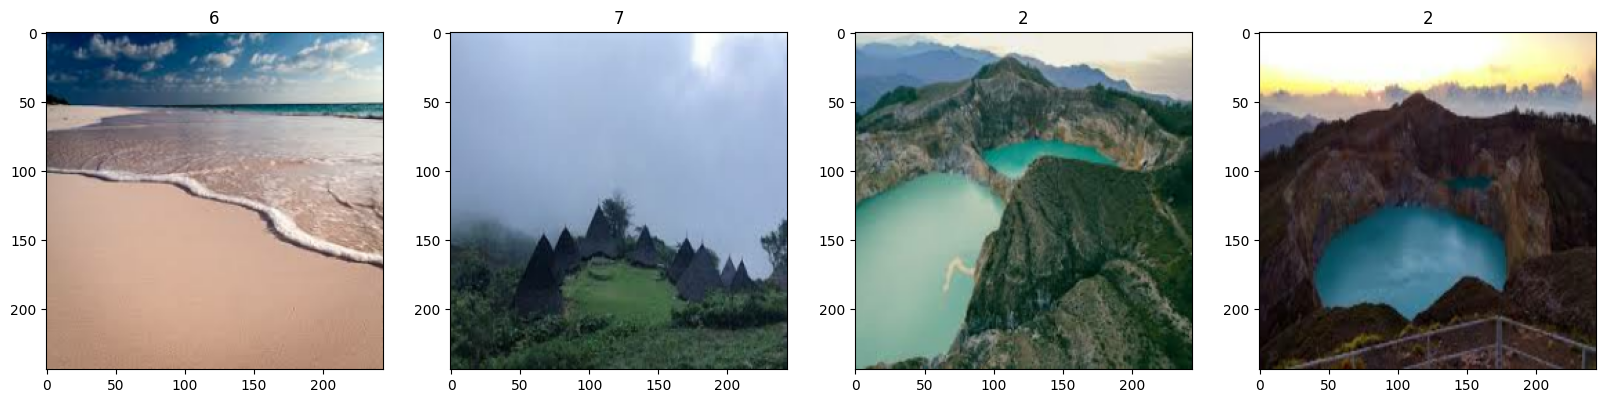

In [19]:
#identifikasi kelas
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

0 = pandar

1 = wae rebo

## processing data

In [20]:
data = data.map(lambda x,y: (x/225.0, y))

In [21]:
data.as_numpy_iterator().next()[0].min()

0.0

In [22]:
data.as_numpy_iterator().next()[0].max()

1.1333333

### split data

In [23]:
len(data) #ngitung batch, per batch ada 32 gamber

52

In [24]:
train_size = int(len(data)*0.8)
test_size = int(len(data)*0.2) + 1

train_dataset = data.take(train_size)
test_dataset = data.skip(train_size).take(test_size)

In [25]:
len(train_dataset)

41

In [26]:
len(test_dataset)

11

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [28]:
model = Sequential()
#
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(244,244,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(9, activation='softmax'))

In [29]:
model.compile(optimizer='adam',
              loss= tf.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [30]:
# this will take around 20 minutes to complete
EPOCHS = 5
history = model.fit(train_dataset,  
                    epochs=EPOCHS,
                    validation_data=test_dataset)

Epoch 1/5


41/41 [==============================] - 21s 401ms/step - loss: 1.7170 - accuracy: 0.4154 - val_loss: 1.2444 - val_accuracy: 0.5688
Epoch 2/5
41/41 [==============================] - 14s 329ms/step - loss: 1.1354 - accuracy: 0.6235 - val_loss: 1.0414 - val_accuracy: 0.6728
Epoch 3/5
41/41 [==============================] - 13s 304ms/step - loss: 0.8698 - accuracy: 0.7195 - val_loss: 0.9109 - val_accuracy: 0.6789
Epoch 4/5
41/41 [==============================] - 14s 329ms/step - loss: 0.6225 - accuracy: 0.8011 - val_loss: 0.8088 - val_accuracy: 0.7523
Epoch 5/5
41/41 [==============================] - 13s 302ms/step - loss: 0.5010 - accuracy: 0.8384 - val_loss: 0.6072 - val_accuracy: 0.8104


In [31]:
from tensorflow.keras.models import load_model

In [34]:
model.save_weights('weights/weights-000/weights')

In [35]:
model.save(os.path.join('models/h5', 'explorentt.h5'))

In [45]:
import subprocess

In [46]:
command = [
    'tensorflowjs_converter',
    '--input_format', 'keras',
    'models/h5/explorentt.h5',
    'models/h5-tfjs'
]

In [47]:
subprocess.run(command, check=True)

CalledProcessError: Command '['tensorflowjs_converter', '--input_format', 'keras', 'models/h5/explorentt.h5', 'models/h5-tfjs']' returned non-zero exit status 1.

In [41]:
!tensorflowjs_converter --input_format=keras models/h5/explorentt.h5 models/h5-tfjs


Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Scripts\tensorflowjs_converter.exe\__main__.py", line 4, in <module>
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflowjs\__init__.py", line 21, in <module>
    from tensorflowjs import converters
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflowjs\converters\__init__.py", line 21, in <module>
    from tensorflowjs.converters.converter import convert
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflowjs\converters\converter.py", line 38, in <module>
    from tensorflowjs.converters import tf_saved_model_conversion_v2
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflowjs\converters\tf_saved_model_conversion_v2.py", line 2